![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
data = pd.read_csv("ML_cars.csv")

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [116]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Vamos a cambiar de nombre a las columnas, vamos a poner en español los nombres

In [117]:
data.columns = ['Id', 'ClasificacionRiesgo', 'Nombre', "TipoCombustible", 
                "TipoAspiracionMotor", "NumPuertas", "TipoCarroceria", 
                "EjeTraccion", "UbicacionMotor", "DistanciaEjes", 
                "Longitud", "Ancho", "Altura", "PesoSinCarga", "TipoMotor", 
                "NumCilindrosMotor", "TamañoMotor", "SistemaCombustible", 
                "RelacionDiametroCarrera", "VolumenCilindrada", 
                "RelacionComprecionAire", "Potencia", "RevolucionesMaxMotor", 
                "ConsumoCiudad", "ConsumoRuta", "Precio"
                ]

In [118]:
data.head(1)

,Id,ClasificacionRiesgo,Nombre,TipoCombustible,TipoAspiracionMotor,NumPuertas,TipoCarroceria,EjeTraccion,UbicacionMotor,DistanciaEjes,...,TamañoMotor,SistemaCombustible,RelacionDiametroCarrera,VolumenCilindrada,RelacionComprecionAire,Potencia,RevolucionesMaxMotor,ConsumoCiudad,ConsumoRuta,Precio
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [119]:
data.describe()

,Id,ClasificacionRiesgo,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,TamañoMotor,RelacionDiametroCarrera,VolumenCilindrada,RelacionComprecionAire,Potencia,RevolucionesMaxMotor,ConsumoCiudad,ConsumoRuta,Precio
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [120]:
nombres_columnas = data.columns.tolist()
nombres_columnas

['Id',
 'ClasificacionRiesgo',
 'Nombre',
 'TipoCombustible',
 'TipoAspiracionMotor',
 'NumPuertas',
 'TipoCarroceria',
 'EjeTraccion',
 'UbicacionMotor',
 'DistanciaEjes',
 'Longitud',
 'Ancho',
 'Altura',
 'PesoSinCarga',
 'TipoMotor',
 'NumCilindrosMotor',
 'TamañoMotor',
 'SistemaCombustible',
 'RelacionDiametroCarrera',
 'VolumenCilindrada',
 'RelacionComprecionAire',
 'Potencia',
 'RevolucionesMaxMotor',
 'ConsumoCiudad',
 'ConsumoRuta',
 'Precio']

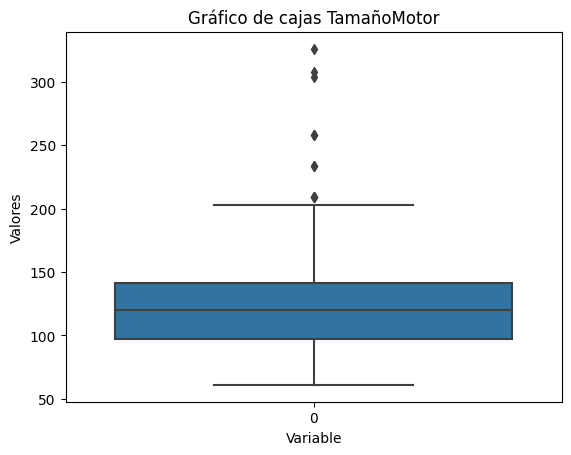

In [121]:
# Crear el gráfico de cajas
sns.boxplot(data["TamañoMotor"])

# Agregar etiquetas y título
plt.xlabel('Variable')
plt.ylabel('Valores')
plt.title('Gráfico de cajas TamañoMotor')

# Mostrar el gráfico de cajas
plt.show()

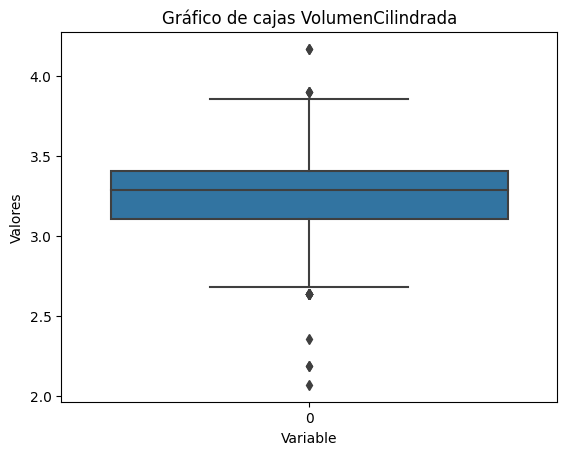

In [122]:
# Crear el gráfico de cajas
sns.boxplot(data["VolumenCilindrada"])

# Agregar etiquetas y título
plt.xlabel('Variable')
plt.ylabel('Valores')
plt.title('Gráfico de cajas VolumenCilindrada')

# Mostrar el gráfico de cajas
plt.show()

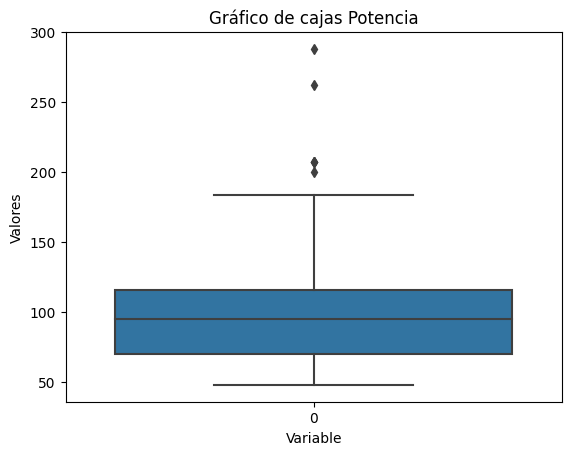

In [123]:
# Crear el gráfico de cajas
sns.boxplot(data["Potencia"])

# Agregar etiquetas y título
plt.xlabel('Variable')
plt.ylabel('Valores')
plt.title('Gráfico de cajas Potencia')

# Mostrar el gráfico de cajas
plt.show()

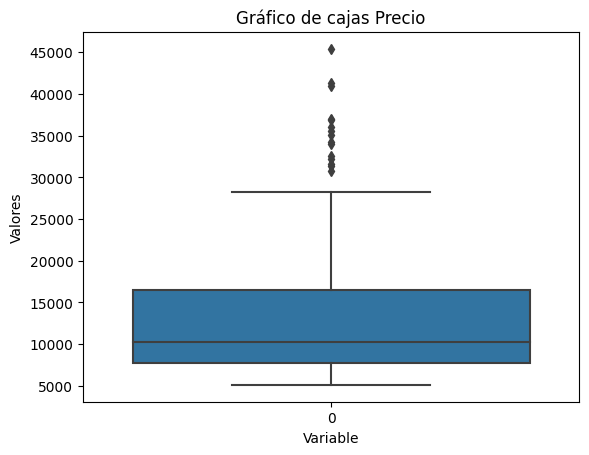

In [124]:
# Crear el gráfico de cajas
sns.boxplot(data["Precio"])

# Agregar etiquetas y título
plt.xlabel('Variable')
plt.ylabel('Valores')
plt.title('Gráfico de cajas Precio')

# Mostrar el gráfico de cajas
plt.show()

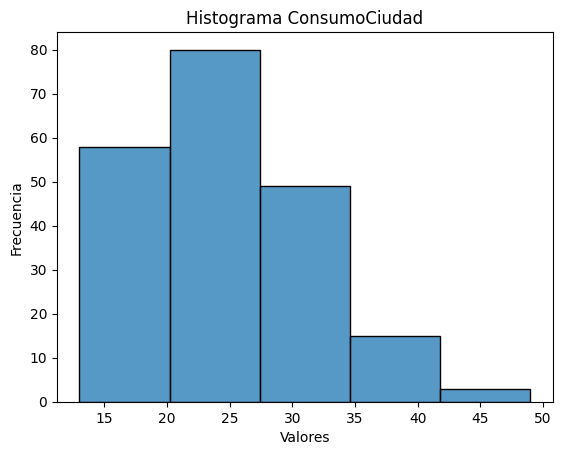

In [125]:
# Crear el histograma
sns.histplot(data['ConsumoCiudad'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma ConsumoCiudad')

# Mostrar el histograma
plt.show()

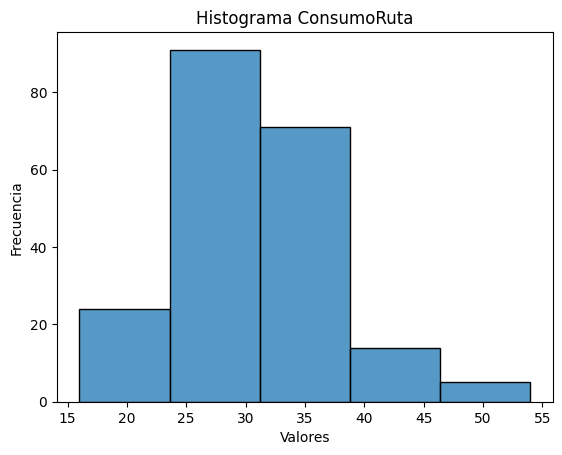

In [126]:
# Crear el histograma
sns.histplot(data['ConsumoRuta'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma ConsumoRuta')

# Mostrar el histograma
plt.show()

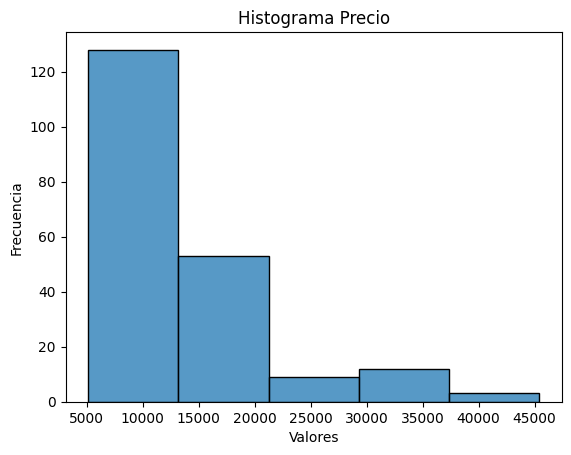

In [127]:
# Crear el histograma
sns.histplot(data['Precio'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma Precio')

# Mostrar el histograma
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

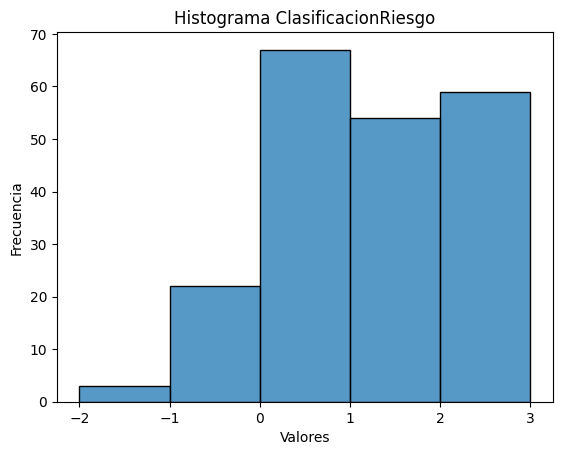

In [128]:
# Crear el histograma
sns.histplot(data['ClasificacionRiesgo'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma ClasificacionRiesgo')

# Mostrar el histograma
plt.show()

Vamos a clasificar desde -3 hasta 0 como poco riesgoso muy seguro, desde 0 a 1 riesgo intermedio y desde 1 hasta 3 como riesgoso poco seguro

In [129]:
# Obtener los distintos valores de una columna utilizando el método unique()
valores_distintos = data['ClasificacionRiesgo'].unique()
valores_distintos

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [130]:
# Cambiar varios valores específicos utilizando el método replace()
reemplazos_bajos = [-1, -2]
for reemplazo in reemplazos_bajos:
    data['ClasificacionRiesgo'] = data['ClasificacionRiesgo'].replace({reemplazo: "muy seguro"})

reemplazos_altos = [3,  1,  2]
for reemplazo in reemplazos_altos:
    data['ClasificacionRiesgo'] = data['ClasificacionRiesgo'].replace({reemplazo: "poco seguro"})

data['ClasificacionRiesgo'] = data['ClasificacionRiesgo'].replace({0: "intermedio"})


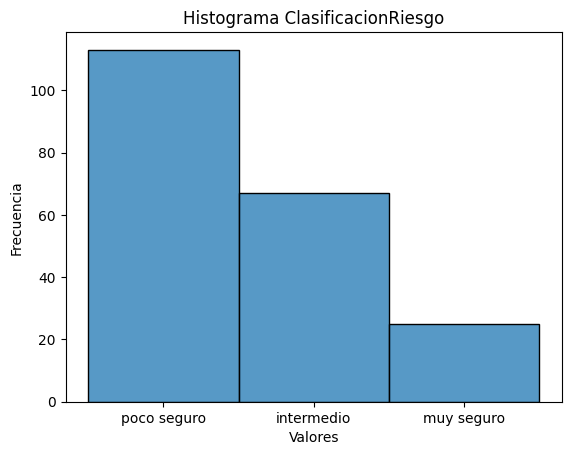

In [131]:
# Crear el histograma
sns.histplot(data['ClasificacionRiesgo'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma ClasificacionRiesgo')

# Mostrar el histograma
plt.show()

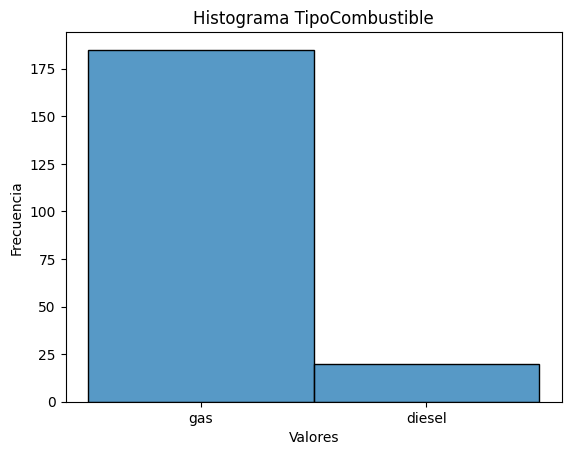

In [132]:
# Crear el histograma
sns.histplot(data['TipoCombustible'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma TipoCombustible')

# Mostrar el histograma
plt.show()

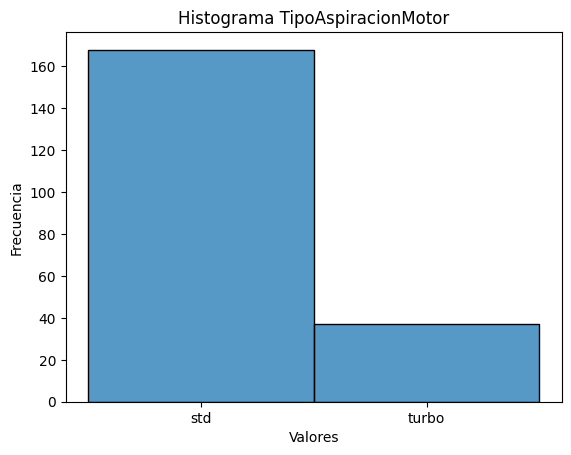

In [133]:
# Crear el histograma
sns.histplot(data['TipoAspiracionMotor'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma TipoAspiracionMotor')

# Mostrar el histograma
plt.show()

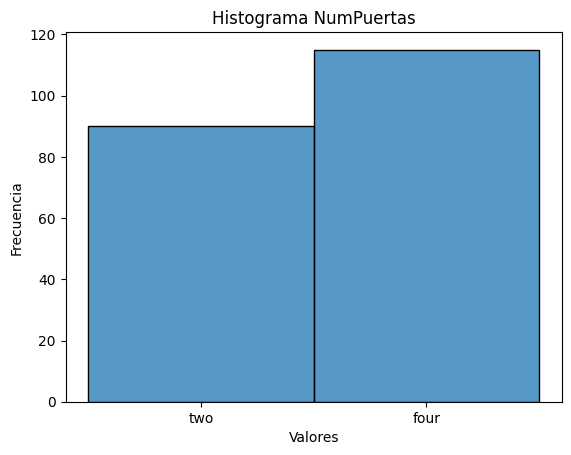

In [134]:
# Crear el histograma
sns.histplot(data['NumPuertas'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma NumPuertas')

# Mostrar el histograma
plt.show()

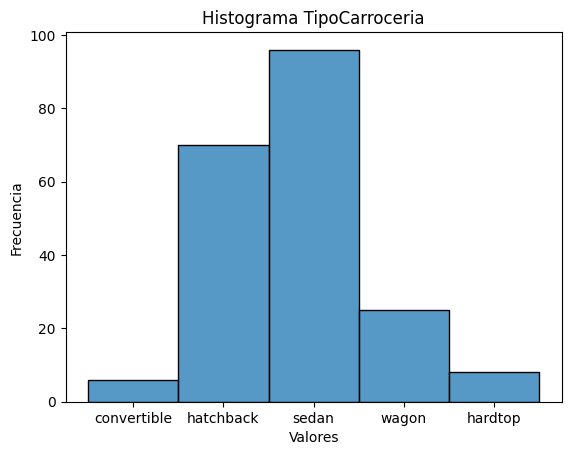

In [135]:
# Crear el histograma
sns.histplot(data['TipoCarroceria'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma TipoCarroceria')

# Mostrar el histograma
plt.show()

Para minimizar la cantidad de variables dummies vamos a convinar convertible y hardtop en una sola categoria(otro)

In [136]:
# Obtener los distintos valores de una columna utilizando el método unique()
valores_distintos = data['TipoCarroceria'].unique()
valores_distintos

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [137]:
# Cambiar varios valores específicos utilizando el método replace()
reemplazos = ['convertible', 'hardtop']
for reemplazo in reemplazos:
    data['TipoCarroceria'] = data['TipoCarroceria'].replace({reemplazo: "otro"})

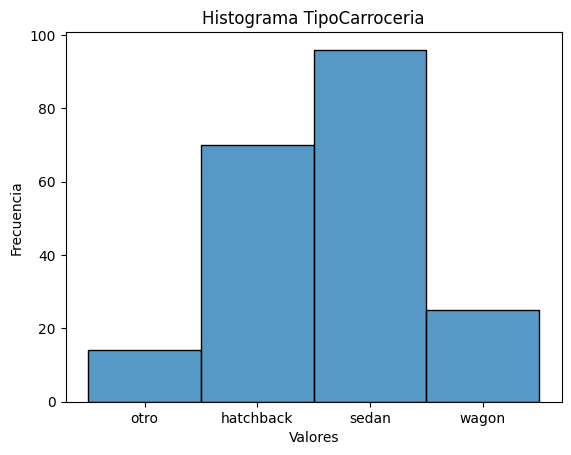

In [138]:
# Crear el histograma
sns.histplot(data['TipoCarroceria'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma TipoCarroceria')

# Mostrar el histograma
plt.show()

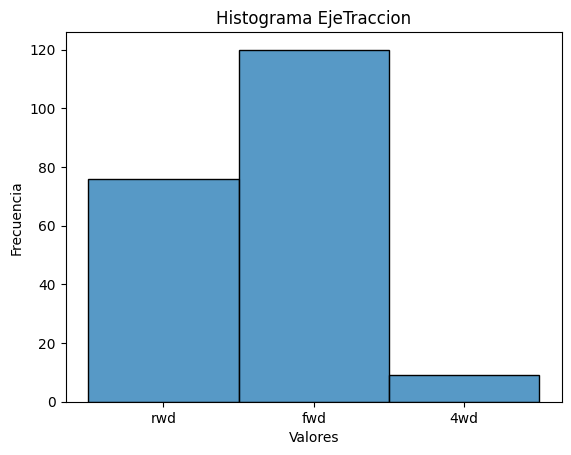

In [139]:
# Crear el histograma
sns.histplot(data['EjeTraccion'], bins=5)

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma EjeTraccion')

# Mostrar el histograma
plt.show()

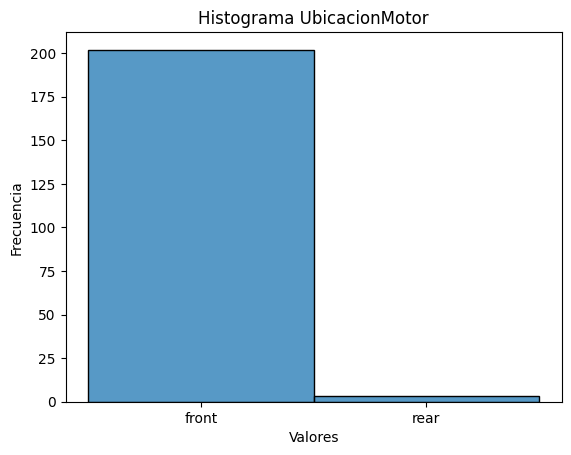

In [140]:
# Crear el histograma
sns.histplot(data['UbicacionMotor'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma UbicacionMotor')

# Mostrar el histograma
plt.show()

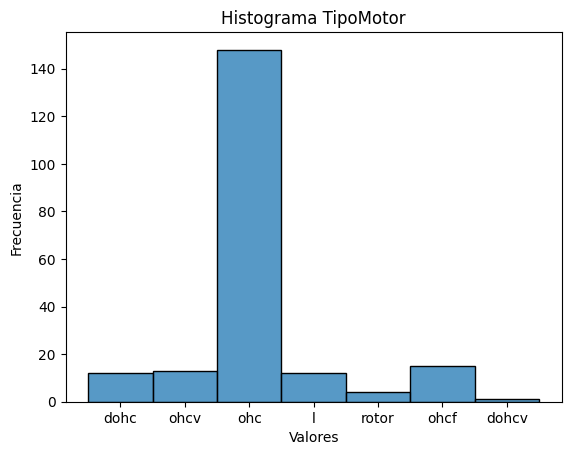

In [141]:
# Crear el histograma
sns.histplot(data['TipoMotor'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma TipoMotor')

# Mostrar el histograma
plt.show()

Para que no se generen muchas variables dummies vamos a separar esta categoria en ohc y no ohc

In [142]:
# Obtener los distintos valores de una columna utilizando el método unique()
valores_distintos = data['TipoMotor'].unique()
valores_distintos

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [143]:
# Cambiar varios valores específicos utilizando el método replace()
reemplazos = ['dohc', 'ohcv', 'l', 'rotor', 'ohcf', 'dohcv']
for reemplazo in reemplazos:
    data['TipoMotor'] = data['TipoMotor'].replace({reemplazo: "No ohc"})

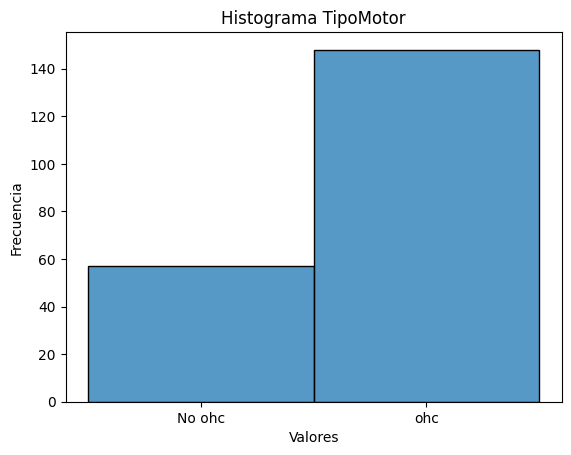

In [144]:
# Crear el histograma
sns.histplot(data['TipoMotor'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma TipoMotor')

# Mostrar el histograma
plt.show()

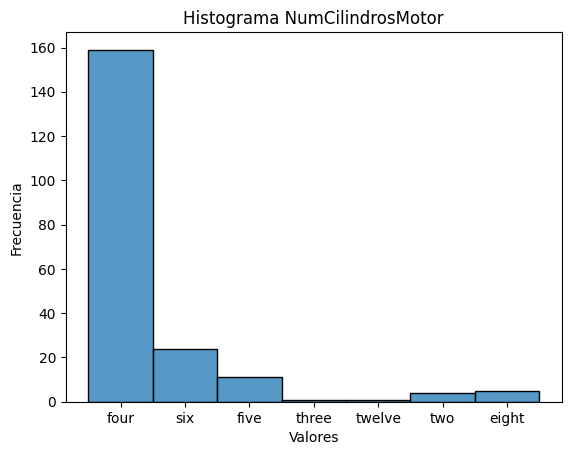

In [145]:
# Crear el histograma
sns.histplot(data['NumCilindrosMotor'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma NumCilindrosMotor')

# Mostrar el histograma
plt.show()

Para minimizar la cantidad de categorias de esta variable vamos a juntar los que sean menor a 4, los que sean igual a 4 y los que sean mayor a 4

In [146]:
# Obtener los distintos valores de una columna utilizando el método unique()
valores_distintos = data['NumCilindrosMotor'].unique()
valores_distintos


array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [147]:
# Cambiar varios valores específicos utilizando el método replace()
reemplazos_mayor_4 = ['six', 'five', 'twelve', 'eight']
for reemplazo in reemplazos_mayor_4:
    data['NumCilindrosMotor'] = data['NumCilindrosMotor'].replace({reemplazo: "mayor a cuatro"})

reemplazos_menor_4 = ['two', 'three']
for reemplazo in reemplazos_menor_4:
    data['NumCilindrosMotor'] = data['NumCilindrosMotor'].replace({reemplazo: "menor a cuatro"})

data['NumCilindrosMotor'] = data['NumCilindrosMotor'].replace({'four': "cuatro"})

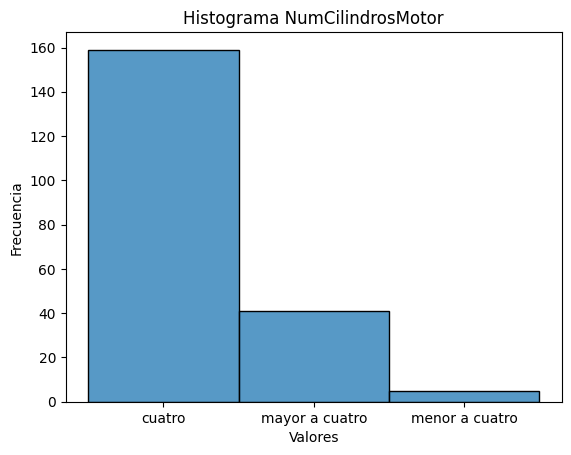

In [148]:
# Crear el histograma
sns.histplot(data['NumCilindrosMotor'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma NumCilindrosMotor')

# Mostrar el histograma
plt.show()

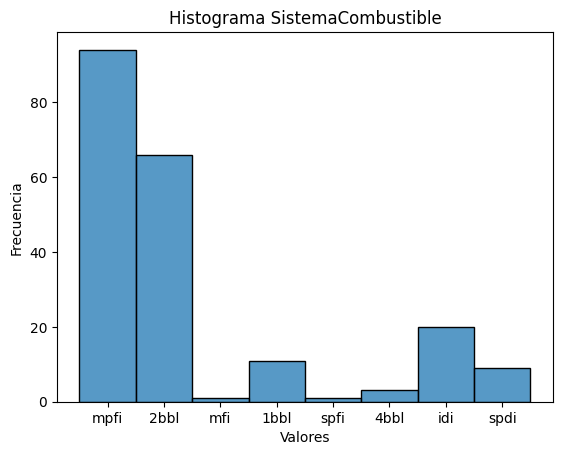

In [149]:
# Crear el histograma
sns.histplot(data['SistemaCombustible'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma SistemaCombustible')

# Mostrar el histograma
plt.show()

Vamos a juntar categorias para minimizar la cantidad

In [150]:
# Obtener los distintos valores de una columna utilizando el método unique()
valores_distintos = data['SistemaCombustible'].unique()
valores_distintos

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [151]:
# Cambiar varios valores específicos utilizando el método replace()
reemplazos = ['mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
for reemplazo in reemplazos:
    data['SistemaCombustible'] = data['SistemaCombustible'].replace({reemplazo: "otro"})

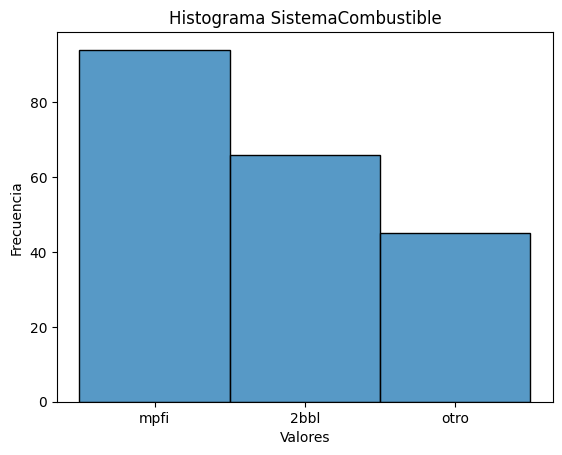

In [152]:
# Crear el histograma
sns.histplot(data['SistemaCombustible'])

# Agregar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma SistemaCombustible')

# Mostrar el histograma
plt.show()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Eliminaremos la columna "Id" y "Nombre" ya que no nos sirve para hacer nuestros modelos.

In [153]:
data.drop('Id', axis=1, inplace=True)
data.drop('Nombre', axis=1, inplace=True)

In [154]:
data.head(1)

,ClasificacionRiesgo,TipoCombustible,TipoAspiracionMotor,NumPuertas,TipoCarroceria,EjeTraccion,UbicacionMotor,DistanciaEjes,Longitud,Ancho,...,TamañoMotor,SistemaCombustible,RelacionDiametroCarrera,VolumenCilindrada,RelacionComprecionAire,Potencia,RevolucionesMaxMotor,ConsumoCiudad,ConsumoRuta,Precio
0,poco seguro,gas,std,two,otro,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


Generamos variables dummies (binarias) para las variables categoricas.

In [155]:
# Genera variables dummies ClasificacionRiesgo
df_dummies = pd.get_dummies(data['ClasificacionRiesgo'], prefix="ClasificacionRiesgo")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('ClasificacionRiesgo', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,TipoCombustible,TipoAspiracionMotor,NumPuertas,TipoCarroceria,EjeTraccion,UbicacionMotor,DistanciaEjes,Longitud,Ancho,Altura,...,VolumenCilindrada,RelacionComprecionAire,Potencia,RevolucionesMaxMotor,ConsumoCiudad,ConsumoRuta,Precio,ClasificacionRiesgo_intermedio,ClasificacionRiesgo_muy seguro,ClasificacionRiesgo_poco seguro
0,gas,std,two,otro,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,False,False,True


In [156]:
# Genera variables dummies TipoCombustible
df_dummies = pd.get_dummies(data['TipoCombustible'], prefix="TipoCombustible")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('TipoCombustible', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,TipoAspiracionMotor,NumPuertas,TipoCarroceria,EjeTraccion,UbicacionMotor,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,...,Potencia,RevolucionesMaxMotor,ConsumoCiudad,ConsumoRuta,Precio,ClasificacionRiesgo_intermedio,ClasificacionRiesgo_muy seguro,ClasificacionRiesgo_poco seguro,TipoCombustible_diesel,TipoCombustible_gas
0,std,two,otro,rwd,front,88.6,168.8,64.1,48.8,2548,...,111,5000,21,27,13495.0,False,False,True,False,True


In [157]:
# Genera variables dummies TipoAspiracionMotor
df_dummies = pd.get_dummies(data['TipoAspiracionMotor'], prefix="TipoAspiracionMotor")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('TipoAspiracionMotor', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,NumPuertas,TipoCarroceria,EjeTraccion,UbicacionMotor,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,TipoMotor,...,ConsumoCiudad,ConsumoRuta,Precio,ClasificacionRiesgo_intermedio,ClasificacionRiesgo_muy seguro,ClasificacionRiesgo_poco seguro,TipoCombustible_diesel,TipoCombustible_gas,TipoAspiracionMotor_std,TipoAspiracionMotor_turbo
0,two,otro,rwd,front,88.6,168.8,64.1,48.8,2548,No ohc,...,21,27,13495.0,False,False,True,False,True,True,False


In [158]:
# Genera variables dummies NumPuertas
df_dummies = pd.get_dummies(data['NumPuertas'], prefix="NumPuertas")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('NumPuertas', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,TipoCarroceria,EjeTraccion,UbicacionMotor,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,TipoMotor,NumCilindrosMotor,...,Precio,ClasificacionRiesgo_intermedio,ClasificacionRiesgo_muy seguro,ClasificacionRiesgo_poco seguro,TipoCombustible_diesel,TipoCombustible_gas,TipoAspiracionMotor_std,TipoAspiracionMotor_turbo,NumPuertas_four,NumPuertas_two
0,otro,rwd,front,88.6,168.8,64.1,48.8,2548,No ohc,cuatro,...,13495.0,False,False,True,False,True,True,False,False,True


In [159]:
# Genera variables dummies TipoCarroceria
df_dummies = pd.get_dummies(data['TipoCarroceria'], prefix="TipoCarroceria")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('TipoCarroceria', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,EjeTraccion,UbicacionMotor,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,TipoMotor,NumCilindrosMotor,TamañoMotor,...,TipoCombustible_diesel,TipoCombustible_gas,TipoAspiracionMotor_std,TipoAspiracionMotor_turbo,NumPuertas_four,NumPuertas_two,TipoCarroceria_hatchback,TipoCarroceria_otro,TipoCarroceria_sedan,TipoCarroceria_wagon
0,rwd,front,88.6,168.8,64.1,48.8,2548,No ohc,cuatro,130,...,False,True,True,False,False,True,False,True,False,False


In [160]:
# Genera variables dummies EjeTraccion
df_dummies = pd.get_dummies(data['EjeTraccion'], prefix="EjeTraccion")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('EjeTraccion', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,UbicacionMotor,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,TipoMotor,NumCilindrosMotor,TamañoMotor,SistemaCombustible,...,TipoAspiracionMotor_turbo,NumPuertas_four,NumPuertas_two,TipoCarroceria_hatchback,TipoCarroceria_otro,TipoCarroceria_sedan,TipoCarroceria_wagon,EjeTraccion_4wd,EjeTraccion_fwd,EjeTraccion_rwd
0,front,88.6,168.8,64.1,48.8,2548,No ohc,cuatro,130,mpfi,...,False,False,True,False,True,False,False,False,False,True


In [161]:
# Genera variables dummies UbicacionMotor
df_dummies = pd.get_dummies(data['UbicacionMotor'], prefix="UbicacionMotor")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('UbicacionMotor', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,TipoMotor,NumCilindrosMotor,TamañoMotor,SistemaCombustible,RelacionDiametroCarrera,...,NumPuertas_two,TipoCarroceria_hatchback,TipoCarroceria_otro,TipoCarroceria_sedan,TipoCarroceria_wagon,EjeTraccion_4wd,EjeTraccion_fwd,EjeTraccion_rwd,UbicacionMotor_front,UbicacionMotor_rear
0,88.6,168.8,64.1,48.8,2548,No ohc,cuatro,130,mpfi,3.47,...,True,False,True,False,False,False,False,True,True,False


In [162]:
# Genera variables dummies TipoMotor
df_dummies = pd.get_dummies(data['TipoMotor'], prefix="TipoMotor")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('TipoMotor', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,NumCilindrosMotor,TamañoMotor,SistemaCombustible,RelacionDiametroCarrera,VolumenCilindrada,...,TipoCarroceria_otro,TipoCarroceria_sedan,TipoCarroceria_wagon,EjeTraccion_4wd,EjeTraccion_fwd,EjeTraccion_rwd,UbicacionMotor_front,UbicacionMotor_rear,TipoMotor_No ohc,TipoMotor_ohc
0,88.6,168.8,64.1,48.8,2548,cuatro,130,mpfi,3.47,2.68,...,True,False,False,False,False,True,True,False,True,False


In [163]:
# Genera variables dummies NumCilindrosMotor
df_dummies = pd.get_dummies(data['NumCilindrosMotor'], prefix="NumCilindrosMotor")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('NumCilindrosMotor', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,TamañoMotor,SistemaCombustible,RelacionDiametroCarrera,VolumenCilindrada,RelacionComprecionAire,...,EjeTraccion_4wd,EjeTraccion_fwd,EjeTraccion_rwd,UbicacionMotor_front,UbicacionMotor_rear,TipoMotor_No ohc,TipoMotor_ohc,NumCilindrosMotor_cuatro,NumCilindrosMotor_mayor a cuatro,NumCilindrosMotor_menor a cuatro
0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,...,False,False,True,True,False,True,False,True,False,False


In [164]:
# Genera variables dummies SistemaCombustible
df_dummies = pd.get_dummies(data['SistemaCombustible'], prefix="SistemaCombustible")

# Combina las variables dummies con el DataFrame original
data = pd.concat([data, df_dummies], axis=1)

#Eliminamos la variable categorica pasada a dummies
data.drop('SistemaCombustible', axis=1, inplace=True)

# Imprime el DataFrame con las variables dummies
data.head(1)

,DistanciaEjes,Longitud,Ancho,Altura,PesoSinCarga,TamañoMotor,RelacionDiametroCarrera,VolumenCilindrada,RelacionComprecionAire,Potencia,...,UbicacionMotor_front,UbicacionMotor_rear,TipoMotor_No ohc,TipoMotor_ohc,NumCilindrosMotor_cuatro,NumCilindrosMotor_mayor a cuatro,NumCilindrosMotor_menor a cuatro,SistemaCombustible_2bbl,SistemaCombustible_mpfi,SistemaCombustible_otro
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,True,False,True,False,True,False,False,False,True,False


Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Vamos a eliminar la variable PesoSinCarga ya que esta muy correlacionada con Longitud y Ancho.
Vamos a eliminar DistanciaEjes ya que esta muy relacionada con Longitud.
Vamos a eliminar TamañoMotor ya que esta muy correlacionada con Precio.
Vamos a eliminar ConsumoRuta ya que esta muy correlacionada con ConsumoCiudad.

Vamos a seleccionar solo las variables numericas para hacer la matriz de correlacion

In [165]:
# Obtener los nombres de las columnas en una lista
lista_columnas = data.columns.tolist()
lista_columnas

['DistanciaEjes',
 'Longitud',
 'Ancho',
 'Altura',
 'PesoSinCarga',
 'TamañoMotor',
 'RelacionDiametroCarrera',
 'VolumenCilindrada',
 'RelacionComprecionAire',
 'Potencia',
 'RevolucionesMaxMotor',
 'ConsumoCiudad',
 'ConsumoRuta',
 'Precio',
 'ClasificacionRiesgo_intermedio',
 'ClasificacionRiesgo_muy seguro',
 'ClasificacionRiesgo_poco seguro',
 'TipoCombustible_diesel',
 'TipoCombustible_gas',
 'TipoAspiracionMotor_std',
 'TipoAspiracionMotor_turbo',
 'NumPuertas_four',
 'NumPuertas_two',
 'TipoCarroceria_hatchback',
 'TipoCarroceria_otro',
 'TipoCarroceria_sedan',
 'TipoCarroceria_wagon',
 'EjeTraccion_4wd',
 'EjeTraccion_fwd',
 'EjeTraccion_rwd',
 'UbicacionMotor_front',
 'UbicacionMotor_rear',
 'TipoMotor_No ohc',
 'TipoMotor_ohc',
 'NumCilindrosMotor_cuatro',
 'NumCilindrosMotor_mayor a cuatro',
 'NumCilindrosMotor_menor a cuatro',
 'SistemaCombustible_2bbl',
 'SistemaCombustible_mpfi',
 'SistemaCombustible_otro']

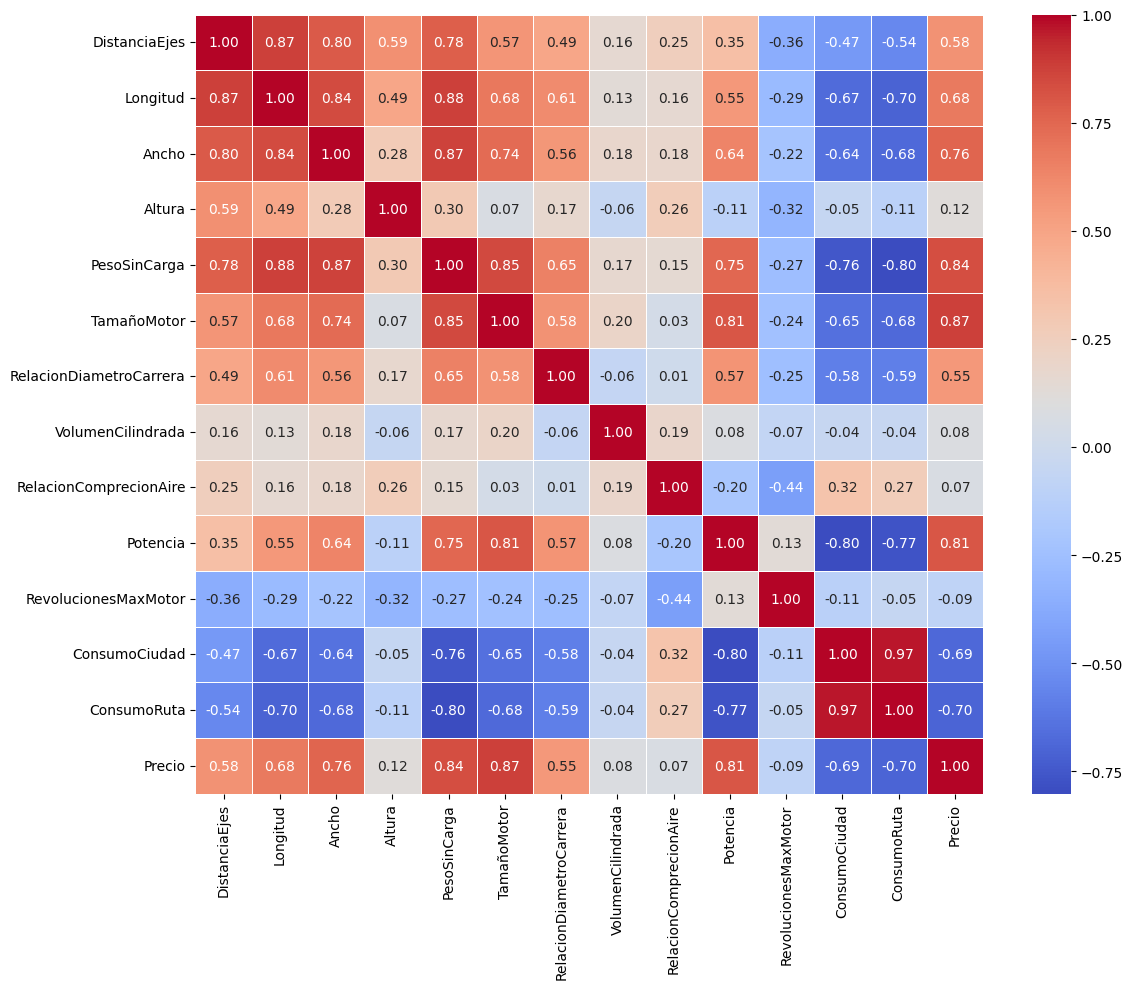

In [166]:
# Seleccionamos solo las variables numericas
variables_num = ['DistanciaEjes', 'Longitud', 'Ancho', 'Altura', 'PesoSinCarga', 'TamañoMotor', 'RelacionDiametroCarrera',
                 'VolumenCilindrada', 'RelacionComprecionAire', 'Potencia', 'RevolucionesMaxMotor', 'ConsumoCiudad',
                 'ConsumoRuta', 'Precio']
df_variables_num = data[variables_num]

# Calcular la matriz de correlación
correlation_matrix = df_variables_num.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajustar el diseño del gráfico para evitar superposiciones
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()


In [167]:
borrar = ["PesoSinCarga", "DistanciaEjes", "TamañoMotor", "ConsumoRuta"]
for b in borrar:
    del data[b]

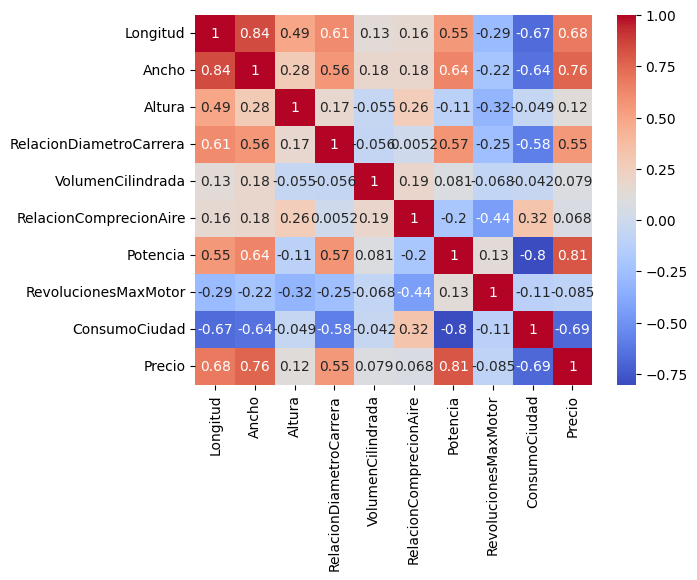

In [168]:
#Seleccionamos solo las variables numericas
variables_num = ['Longitud',
 'Ancho',
 'Altura',
 'RelacionDiametroCarrera',
 'VolumenCilindrada',
 'RelacionComprecionAire',
 'Potencia',
 'RevolucionesMaxMotor',
 'ConsumoCiudad',
 'Precio']
df_variables_num = data[variables_num]

# Calcular la matriz de correlación
correlation_matrix = df_variables_num.corr()

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el mapa de calor
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [169]:
# Exportar el DataFrame a un archivo CSV
data.to_csv('ML_cars_José.csv', index=False)